In [2]:
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential([
              ## Fully Connected Layer
              Dense(2, activation='relu'), 
              Dense(3, activation='relu'),
              Dense(4, activation='relu')
            ])

In [10]:
model.compile()

In [11]:
model.build(input_shape=(2,1))

In [12]:
model.get_weights()

[array([[ 0.26630366, -1.0869305 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.36898077, -0.2548666 , -0.9774515 ],
        [-0.46608752,  0.5831467 ,  0.45606518]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.4101106 ,  0.21282363, -0.80730826,  0.87343824],
        [ 0.23559642,  0.4790672 , -0.53071076,  0.10737371],
        [-0.4717131 ,  0.14032269,  0.2690909 , -0.15206188]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32)]

In [27]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

In [28]:
x_train_cifar.shape, x_train_mnist.shape

((50000, 32, 32, 3), (60000, 28, 28))

In [11]:
x_train_cifar[0].shape

(32, 32, 3)

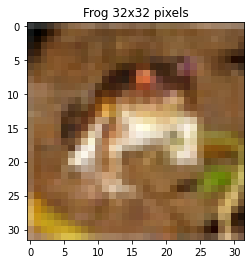

In [35]:
plt.imshow(x_train_cifar[0])

plt.title("Frog 32x32 pixels")
plt.savefig("Frog.jpg")
plt.show()

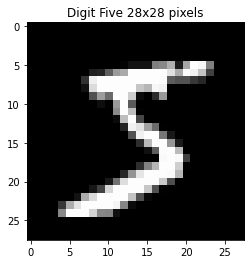

In [36]:
img = cv2.cvtColor(x_train_mnist[0], cv2.COLOR_BGR2RGB)
plt.imshow(img)

plt.title("Digit Five 28x28 pixels")
plt.savefig("Five.jpg")
plt.show()

In [23]:
df = pd.DataFrame({"poi":["bahy&co.", "Musholla Al-Furqon"], "lat":[-6.417962842402161, -6.418205863487273], "long":[106.7801263920717, 106.77900139524297]})
df.head()

,poi,lat,long
0,bahy&co.,-6.417963,106.780126
1,Musholla Al-Furqon,-6.418206,106.779001


In [24]:
BOUNDING_BOX = (df.long.min(), df.long.max(), df.lat.min(), df.lat.max())
BOUNDING_BOX

(106.77900139524297, 106.7801263920717, -6.418205863487273, -6.417962842402161)

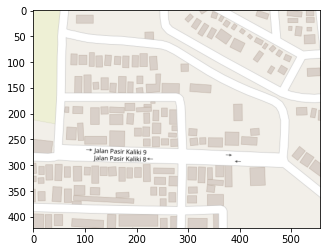

In [25]:
map_img = plt.imread('map.png')
plt.imshow(map_img)
plt.show()

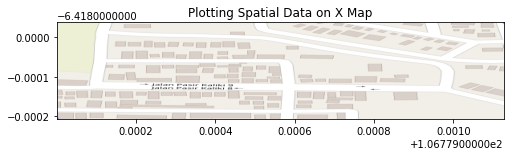

In [26]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df.long, df.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on X Map')
ax.set_xlim(BOUNDING_BOX[0], BOUNDING_BOX[1])
ax.set_ylim(BOUNDING_BOX[2], BOUNDING_BOX[3])
ax.imshow(map_img, zorder=0, extent=BOUNDING_BOX, aspect='equal')